# Esame 2022 07 13

## Teoria

1. Cosa si intende per correlazione e convoluzione? Quali caratteristiche hanno in comune? Quali sono le differenze?

Con il termine di correlazione e convoluzione, si intende l'applicazione di filtri attraverso delle formule specifiche. Se i due filtri sono simmetrici la correlazione e la convoluzione si equivalgono. Le caratteristiche che entrambi hanno in comune sono la proprietà associativa rispetto un fattore di scala e la proprietà distributiva, mentre l'unica differenza è che solamente alcune proprietà sono della convoluzione ovvero, proprietà commutativa e associativa. 

2. Definire formalmente i seguenti termini nel contesto della topologia digitale: vicini, percorso, componente connessa.

All'interno del contesto della topologia digitale abbiamo:
1. "vicino", indica due pixel aventi distanza unitaria
2. "percorso", un percorso di lunghezza N, da P a Q, è una sequenza di pixel, tale che in accordo con la metrica selezionata, pi è un vicino di pi+1 con i che va da 0 a N
3. "componente connessa", una componente connessa è un sottoinsieme di F o F*, tale per cui presi due pixel esiste un percorso che li unisce a seconda della metrica selezionata.  

3. Si descriva l’algoritmo Mean-Shift.

L'algoritmo di Mean-Shift, è un algoritmo iterativo per determinare i massimi locali di una funzione di densità di probabilità a partire da un insieme di campioni. Sia W la regione che conteneva nel pixel precedente l'oggetto, sia C la mappa di confidenza che indica la probabilità che un pixel del nuovo frame appartenga all'oggetto. Ad ogni iterazione si calcola la media pesata di C in W, e si sposta W di conseguenza. Ci si ferma quando la media converge o quando si raggiunge un massimo numero di iterazione. La mappa di confidenza può essere ottenuta analizzando il colore o altre caratteristiche dell'oggetto, si calcola l'istogramma nella regione che conteneva l'oggetto e il valore di ogni pixel di C è dato dalla frequenza di tale luminosità nella window che conteneva l'oggetto. 

## Pratica

1. Calcolare, per ogni immagine nella lista (esclusa l’ultima), la differenza pixel-a-pixel fra l’immagine seguente e l’immagine stessa, memorizzandola come una matrice numpy di interi a 16 bit con segno. Conservare i riferimenti a tali immagini in una lista chiamata diff_frames

2. Costruire una lista masks di immagini binarie con un byte per pixel, con la stessa lunghezza di diff_frames. In ciascuna immagine i pixel che nella corrispondente immagine in diff_frames hanno un valore assoluto maggiore di 20 devono essere posti a 255, mentre tutti gli altri a zero.

3. Modificare ciascuna immagine in masks come segue: etichettarne le componenti connesse ed eliminare quelle con area inferiore a 20 pixel, ponendo i corrispondenti pixel a zero

4. Trovare l’immagine in masks che contiene il maggior numero di pixel a 255

5. Restituire una tupla contenente l’immagine binaria trovata al punto precedente e la corrispondente immagine originale in frames

In [1]:
import numpy as np
import cv2 as cv
import va

In [84]:
def esercizio(imgs):
    # Parte 1
    n = len(imgs)
    diff_frames = [np.diff(imgs[i+1] - imgs[i]).astype(np.int16) for i in range(0, n-1)]
    # Parte 2
    masks = [np.where(np.abs(frame) > 20, 255, 0).astype(np.uint8) for frame in diff_frames]
    # Parte 3
    for mask in masks:
        n, cc, stats, _ = cv.connectedComponentsWithStats(mask)
        values = np.argwhere(stats[:, cv.CC_STAT_AREA] < 20)
        mask[np.isin(cc, values)] = 0
    # Parte 4
    max_arg, mask_max = max(enumerate(masks), key=lambda x: np.sum(x[1]))
    # Parte 5
    return (mask_max, diff_frames[max_arg])
        

In [86]:
def esercizio_ottimo(imgs):
    diff_frames = []
    for i in range(0, len(imgs) - 1):
        diff_frames.append(np.diff(imgs[i+1] - imgs[i]).astype(np.int16))
    masks = [np.where(np.abs(frame) > 20, 255, 0).astype(np.uint8) for frame in diff_frames]
    for m in masks:
        n, cc, stats, _ = cv.connectedComponentsWithStats(m)
        toRemove = np.argwhere(stats[:, cv.CC_STAT_AREA] < 20)
        m[np.isin(cc, toRemove)] = 0
    index_most_changed, mask_most_changed = max(enumerate(masks), key=lambda x: np.count_nonzero(x[1]))
    return mask_most_changed, diff_frames[index_most_changed]

In [42]:
images = [np.random.randint(0, 255, (20, 20), dtype=np.uint8) for i in range(1, 7)]

mask,frame,mask ottima,frame ottimo
,,,

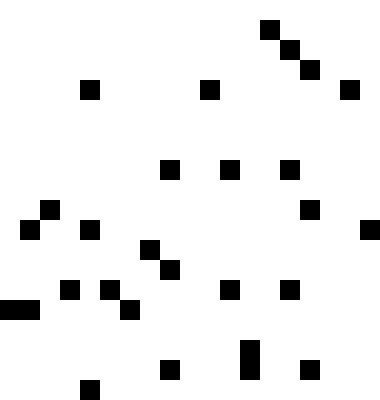
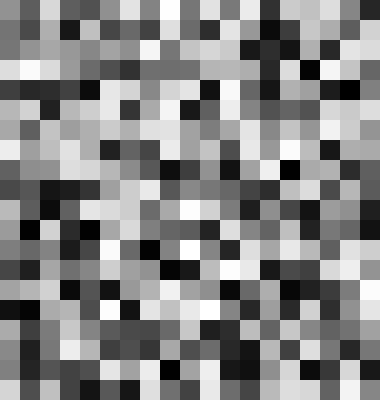
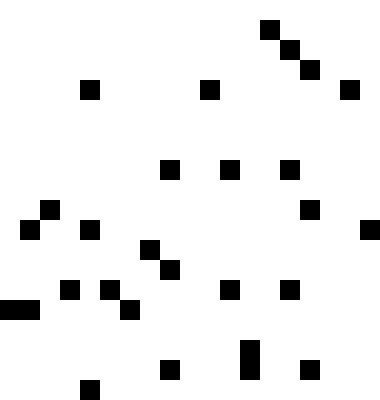
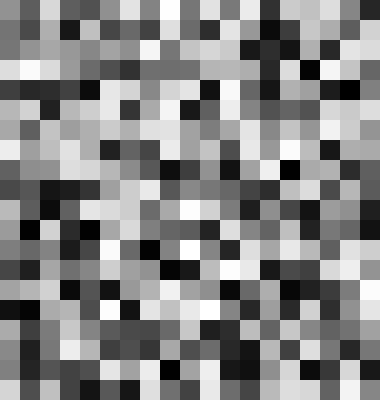

In [87]:
mask, frame = esercizio(images)
mask2, frame2 = esercizio_ottimo(images)
va.show((mask, "mask"), (frame, "frame"), (mask2, "mask ottima"), (frame2, "frame ottimo"))